In [364]:
#VERSION INFO
import sys
import sklearn
import tensorflow 
import keras
import platform

print (sys.version)
print("Python Version",  platform.python_version())
print ("Tensorflow Version:", tensorflow.__version__)
print ("sklearn Version",sklearn.__version__)
print ("Keras Version",keras.__version__)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Python Version 3.7.4
Tensorflow Version: 2.1.0
sklearn Version 0.21.3
Keras Version 2.3.1


In [365]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
import csv

In [366]:
#Misc
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

#Sci-kit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

In [367]:
path = r'C:\Users\Mukuu\Desktop\MSc Proj'
data = pd.read_table(path + r'\OLID\olid-training-v1.0.tsv')
test_df = pd.read_csv(path + r'\test_b_tweets_cleaned.csv')
print(data.head())

      id                                              tweet subtask_a  \
0  86426  @USER She should ask a few native Americans wh...       OFF   
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...       OFF   
2  16820  Amazon is investigating Chinese employees who ...       NOT   
3  62688  @USER Someone should'veTaken" this piece of sh...       OFF   
4  43605  @USER @USER Obama wanted liberals &amp; illega...       NOT   

  subtask_b subtask_c  
0       UNT       NaN  
1       TIN       IND  
2       NaN       NaN  
3       UNT       NaN  
4       NaN       NaN  


In [368]:
def clean_text(sentence):
    trans = str.maketrans('','', string.punctuation)
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    stop_words = set(stopwords.words('english'))
    for i in range(len(sentence)):
        sentence[i] = sentence[i].lower()                # To lower case
        sentence[i] = re.sub(r'\d+', '', sentence[i])    # Remove numbers
        sentence[i] = re.sub(r'’',r"'",sentence[i])     # Modify astrophies
        sentence[i] = re.sub(r'”',r"'",sentence[i])
        sentence[i] = re.sub('@user', '', sentence[i])   # Remove @user
        sentence[i] = sentence[i].translate(trans)       # Remove punctuations
        sentence[i] = emoji_pattern.sub(r'', sentence[i])# Remove imojis
        #sentence[i] = sentence[i].strip()                # Remove white space
        tokens = word_tokenize(sentence[i])
        #print(tokens)
        result = [i for i in tokens if not i in stop_words]
        #print(result)
        sentence[i] = result
    return sentence
# Concatenating everything
def Concat(list_tokens):
    result = []
    for i in list_tokens:
        temp = ''
        for j in i:
            temp = temp + j + ' '
        #print(temp)
        result.append(temp[:-1])
    return result

In [369]:
data = data[['tweet','subtask_b']]

#Filtering data
te = []
la = []
print(len(data))
for i in range(len(data)):
    #print(data['subtask_b'][i])
    if data['subtask_b'][i] == 'TIN' or data['subtask_b'][i] == 'UNT':
        te.append(data['tweet'][i])
        la.append(data['subtask_b'][i])
temp = {'tweet' : te,
        'subtask_b' : la}
data = pd.DataFrame(temp, columns = ['tweet','subtask_b'])
# data

13240


In [370]:
#PREPROCESSING CELL

# #REMOVING OTHER SUBTASKS
# data = data[['tweet','subtask_b']]



#FACTORIZING LABELS
data['label']=data['subtask_b'].factorize()[0]
data = data[['tweet','label']]

sentence = []
for i in data['tweet']:
    sentence.append(i)
clean_tokens = clean_text(sentence)
clean_sentences = Concat(clean_tokens)
cleaned = {'tweet' : clean_sentences,
           'label' : data['label']}
data = pd.DataFrame(cleaned, columns = ['tweet','label'])

print(data.head())

count0 = 0
count1 = 0
for i in data["label"]:
    if i == 0:
        count0+=1
    elif i == 1:
        count1+=1
print("Untargeting: ",count0)
print("Targeting: ",count1)

                                      tweet  label
0                 ask native americans take      0
1        go home youre drunk maga trump url      1
2  someone shouldvetaken piece shit volcano      0
3                           liberals kookoo      1
4                        oh noes tough shit      0
Untargeting:  524
Targeting:  3876


In [371]:
#TOKENIZING AND CREATING SEQUENCE 1
vocabulary_size = 30000
max_len = 100
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(data['tweet'])

sequences = tokenizer.texts_to_sequences(data['tweet'])
X = pad_sequences(sequences, maxlen=max_len)
print(X.shape)
y = np.array(data['label'])

(4400, 100)


In [372]:
test_df
test = {'tweet':test_df['text'],
        'label':test_df['label'].factorize()[0]
}
test = pd.DataFrame(test,columns = ['tweet','label'])
print(test.head())
count0 = 0
count1 = 0
for i in test["label"]:
    if i == 0:
        count0+=1
    else:
        count1+=1
print("Untargeting: ",count0)
print("Targeting: ",count1)

                                               tweet  label
0  top completely fuck trainer boyfriend went fuc...      0
1  course many slovenes respond along lines fool ...      1
2                      means go away sorry ass kkkkk      1
3   hes closer trumps ass greatly shortens kiss time      1
4  looking back old photos makes physically sick ...      0
Untargeting:  572
Targeting:  850


In [373]:
#TOKENIZING AND CREATING SEQUENCE 2
vocabulary_size = 30000
max_len = 100
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(test['tweet'])
sequences = tokenizer.texts_to_sequences(test['tweet'])
X_test = pad_sequences(sequences, maxlen=max_len)
print(X_test.shape)
y_test = np.array(test['label'])

(1422, 100)


In [374]:
#GLOBAL VARIABLES
EMBEDDING_DIM = 200
class_weight = {0:1,1:1}
epochs = 34
split = 0.2

In [375]:
#GLOVE WORD EMBEDDINGS
embeddings_index = dict()
f = open('glove.twitter.27B/glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocabulary_size, 200))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
print("Embeddings Weight Calculated")

Embeddings Weight Calculated


In [376]:
#CROSS VALIDATION 

X_train, X_test, y_train, y_test = X, X_test, y, y_test

In [377]:
from keras.layers import Reshape,Conv2D

In [378]:

#MODEL ARCHITECTURE 2
print("Fitting The model")
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 200, input_length=max_len, weights=[embedding_matrix], trainable=False))
# model_glove.add(Reshape((200,max_len,1)))
# model_glove.add(Conv2D(32,(1,5),activation = 'relu'))
# model_glove.add(Dropout(0.9))
# model_glove.add(Conv2D(16,(2,3),activation = 'relu'))
# model_glove.add(Dropout(0.9))
# model_glove.add(Conv2D(16,(2,2),activation = 'relu'))
# model_glove.add(Dropout(0.7))


model_glove.add(Conv1D(64,5,activation="relu"))
model_glove.add(Dropout(0.5))
model_glove.add(Conv1D(32,3,activation="relu"))
model_glove.add(Dropout(0.5))
model_glove.add(Conv1D(16,3,activation="sigmoid"))
model_glove.add(MaxPooling1D(5))

model_glove.add(Flatten())
model_glove.add(Dense(2, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate = 0.005)
model_glove.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Fit train data
hist = model_glove.fit(X_train,
                       y_train,
                       validation_split = split,
                       epochs = epochs,
                       class_weight = class_weight)

Fitting The model
Train on 3520 samples, validate on 880 samples
Epoch 1/34
3520/3520 [==============================] - 5s 1ms/step - loss: 0.3948 - accuracy: 0.8741 - val_loss: 0.3579 - val_accuracy: 0.8830
Epoch 2/34
3520/3520 [==============================] - 3s 892us/step - loss: 0.3693 - accuracy: 0.8804 - val_loss: 0.3603 - val_accuracy: 0.8830
Epoch 3/34
3520/3520 [==============================] - 3s 962us/step - loss: 0.3650 - accuracy: 0.8804 - val_loss: 0.3599 - val_accuracy: 0.8830
Epoch 4/34
3520/3520 [==============================] - 3s 917us/step - loss: 0.3650 - accuracy: 0.8804 - val_loss: 0.3987 - val_accuracy: 0.8830
Epoch 5/34
3520/3520 [==============================] - 3s 952us/step - loss: 0.3732 - accuracy: 0.8804 - val_loss: 0.3850 - val_accuracy: 0.8830
Epoch 6/34
3520/3520 [==============================] - 3s 962us/step - loss: 0.3631 - accuracy: 0.8804 - val_loss: 0.3785 - val_accuracy: 0.8830
Epoch 7/34
3520/3520 [==============================] - 3s 92

In [379]:
#EVALUATE THE MODEL
print('123')
from sklearn.metrics import classification_report 
score = model_glove.evaluate(X_test,y_test,batch_size=32,verbose=1)
y_pred = model_glove.predict_classes(X_test, batch_size=32, verbose=0)
conf_mat = confusion_matrix(y_test, y_pred)

#DISPLAYING SCORES
print("Confusion Matrix:")
print(conf_mat)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

print("\nClassification Report: ")
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, y_pred, 
                            target_names=target_names, 
                            digits = 4))
accuracy_sklearn = accuracy_score(y_test, y_pred, 
                                  normalize=True,
                                  sample_weight=None)
print("Sklearn Accuracy: ",accuracy_sklearn)

123
1422/1422 [==============================] - 1s 452us/step
Confusion Matrix:
[[ 12 560]
 [ 16 834]]
Test Loss: 1.2005051578985824
Test Accuracy: 0.594936728477478

Classification Report: 
              precision    recall  f1-score   support

     Class 0     0.4286    0.0210    0.0400       572
     Class 1     0.5983    0.9812    0.7433       850

    accuracy                         0.5949      1422
   macro avg     0.5134    0.5011    0.3917      1422
weighted avg     0.5300    0.5949    0.4604      1422

Sklearn Accuracy:  0.5949367088607594


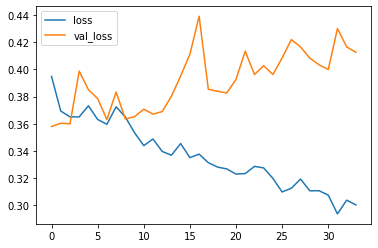

In [380]:
#PLOTS
import matplotlib.pyplot as plt

# plot some data
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

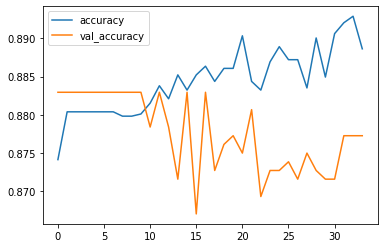

In [381]:
#ACCURACIES
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [382]:
model_glove.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 100, 200)          6000000   
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 96, 64)            64064     
_________________________________________________________________
dropout_39 (Dropout)         (None, 96, 64)            0         
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 94, 32)            6176      
_________________________________________________________________
dropout_40 (Dropout)         (None, 94, 32)            0         
_________________________________________________________________
conv1d_60 (Conv1D)           (None, 92, 16)            1552      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 18, 16)          